<a href="https://colab.research.google.com/github/AdarshNagpure/Find-Me-SOC-project/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##Question 1

In [5]:
data = np.array([[1, 4], [2, 5], [1, 2], [4, 9], [0, 2], [9, 3], [3, 4], [2, 7], [3, 9], [1, 9], [5, 8], [3, 2], [2.3, 4.9], [3.1, 6.4], [4.1, 2.3], [2.6, 8.5], [3.9, 2.3], [8, 1], [2, 5], [3, 3], [4, 4.5], [7.6, 6.7], [8.4, 4.8], [9.1, 1.9]])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

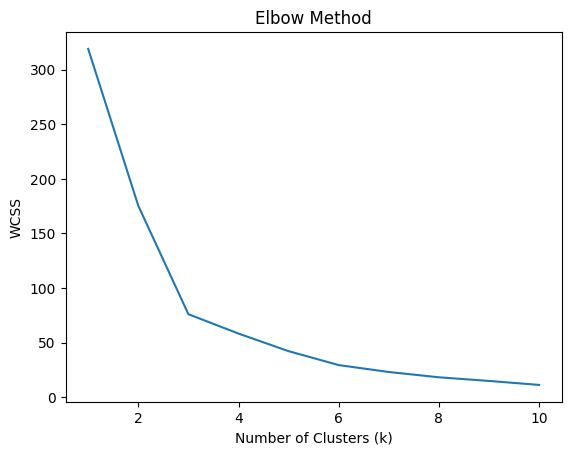

In [6]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


The above cluster is having optimal cluster nnumber of about 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


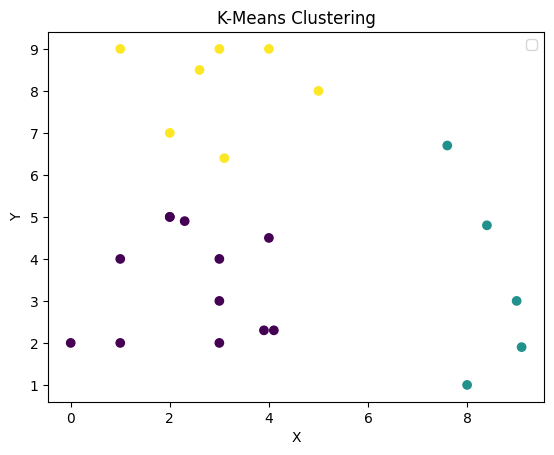

In [9]:
# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data)

# Assign labels to each data point
labels = kmeans.labels_

# Plot the classified data points
plt.scatter(data[:, 0], data[:, 1], c=labels)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Question 2

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


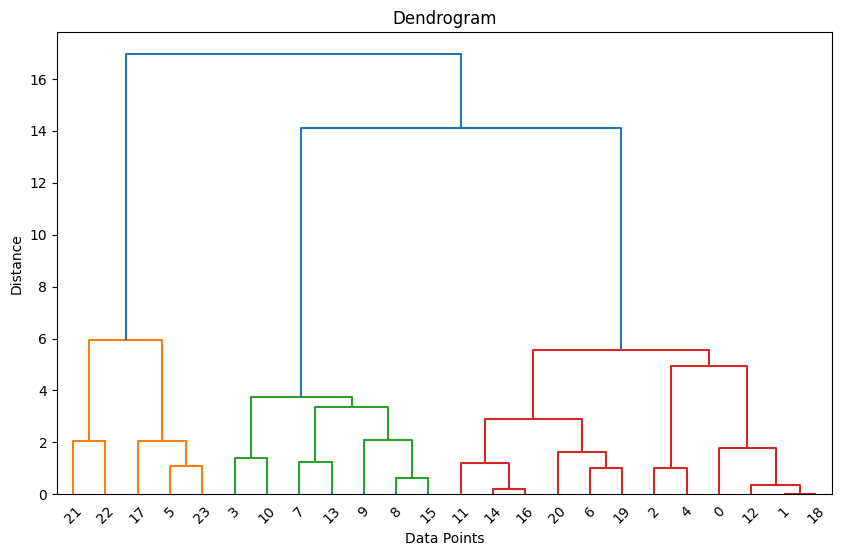

In [11]:
Z = linkage(data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [12]:
k_values = [3, 4, 5, 6, 7]

for k in k_values:
    labels = fcluster(Z, k, criterion='maxclust')
    print(f'Labels for k={k}: {labels}')


Labels for k=3: [3 3 3 2 3 1 3 2 2 2 2 3 3 2 3 2 3 1 3 3 3 1 1 1]
Labels for k=4: [4 4 4 3 4 2 4 3 3 3 3 4 4 3 4 3 4 2 4 4 4 1 1 2]
Labels for k=5: [5 5 5 3 5 2 4 3 3 3 3 4 5 3 4 3 4 2 5 4 4 1 1 2]
Labels for k=6: [6 6 5 3 5 2 4 3 3 3 3 4 6 3 4 3 4 2 6 4 4 1 1 2]
Labels for k=7: [7 7 6 3 6 2 5 4 4 4 3 5 7 4 5 4 5 2 7 5 5 1 1 2]


different method for dendrogram and clustering

In [13]:
methods = ['ward', 'single', 'complete']
dendrograms = []

for method in methods:
    Z = linkage(data, method=method)
    dendrograms.append(Z)


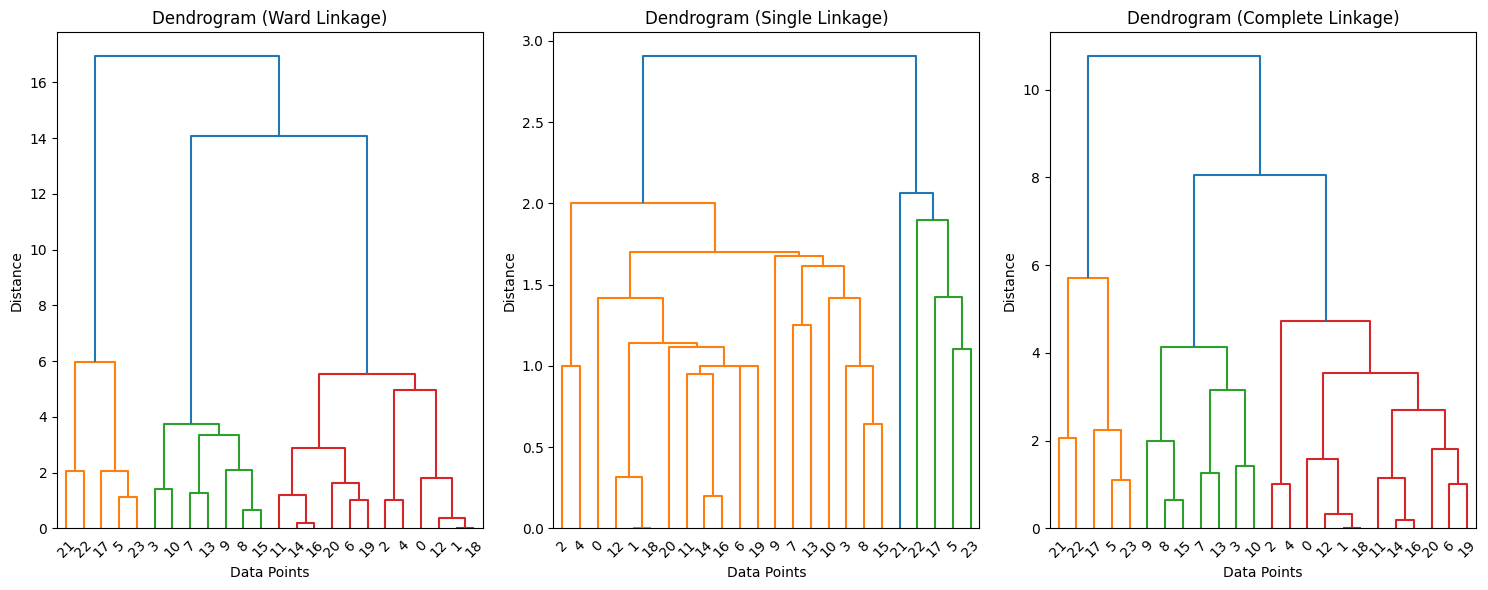

In [14]:
plt.figure(figsize=(15, 6))

for i, method in enumerate(methods):
    plt.subplot(1, 3, i+1)
    dendrogram(dendrograms[i])
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


In [15]:
chosen_method = 'ward'
k_values = [3, 4, 5, 6, 7]

Z = dendrograms[methods.index(chosen_method)]
for k in k_values:
    labels = fcluster(Z, k, criterion='maxclust')
    print(f'Labels for k={k}: {labels}')


Labels for k=3: [3 3 3 2 3 1 3 2 2 2 2 3 3 2 3 2 3 1 3 3 3 1 1 1]
Labels for k=4: [4 4 4 3 4 2 4 3 3 3 3 4 4 3 4 3 4 2 4 4 4 1 1 2]
Labels for k=5: [5 5 5 3 5 2 4 3 3 3 3 4 5 3 4 3 4 2 5 4 4 1 1 2]
Labels for k=6: [6 6 5 3 5 2 4 3 3 3 3 4 6 3 4 3 4 2 6 4 4 1 1 2]
Labels for k=7: [7 7 6 3 6 2 5 4 4 4 3 5 7 4 5 4 5 2 7 5 5 1 1 2]


## Question 3

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


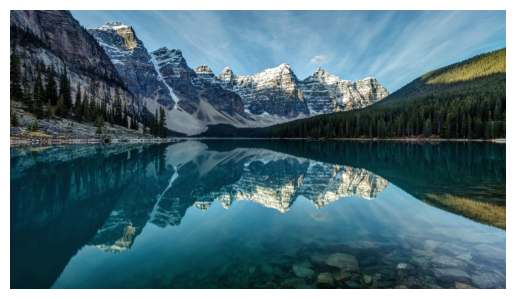

In [27]:
image = cv2.imread('maxresdefault.jpg')  # Replace 'path_to_your_image.jpg' with the actual path to your image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR image to RGB
plt.imshow(image)
plt.axis('off')
plt.show()


In [19]:
pixel_values = image.reshape(-1, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


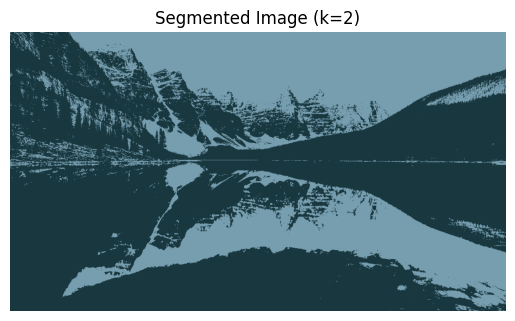

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


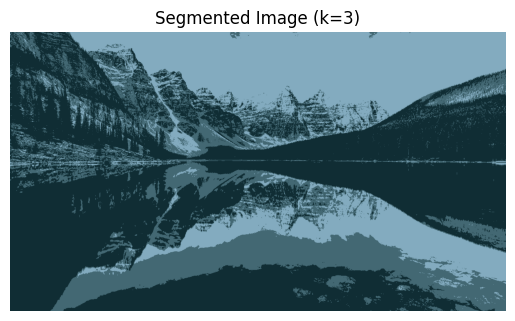

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


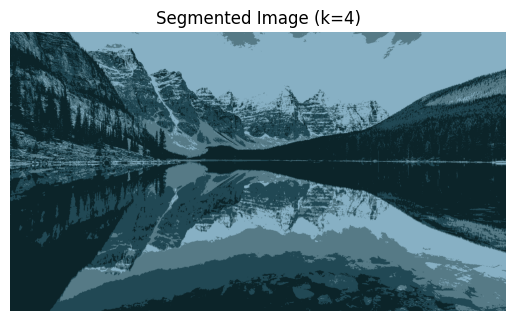

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


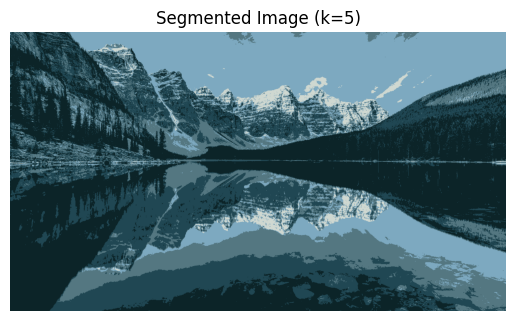

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


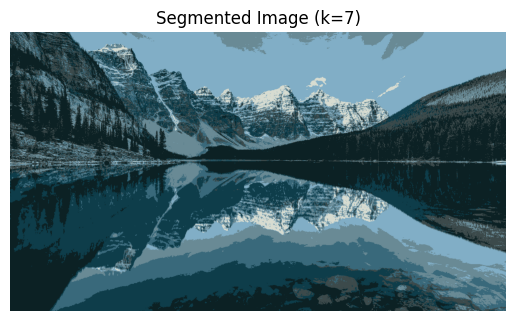

In [29]:
pixel_values = image.reshape(-1, 3).astype(float)

# Perform k-means clustering
k_values = [2, 3, 4, 5, 7]  # Different values of k for clustering

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)
    segmented_image = kmeans.cluster_centers_[kmeans.predict(pixel_values)]
    segmented_image = segmented_image.reshape(image.shape)

    # Display the segmented image
    plt.imshow(segmented_image.astype(np.uint8))
    plt.axis('off')
    plt.title(f'Segmented Image (k={k})')
    plt.show()